<a href="https://colab.research.google.com/github/KEHSANN/hosh_masnoi/blob/main/Q5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor


from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [2]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1Z0F4FumY-afZDuiWqiC8tI4-PPKvaKVJ

Downloading...
From: https://drive.google.com/uc?id=1Z0F4FumY-afZDuiWqiC8tI4-PPKvaKVJ
To: /content/data_banknote_authentication.txt
100% 46.4k/46.4k [00:00<00:00, 81.6MB/s]


In [8]:
#https://drive.google.com/file/d/1mqBXBXbzZbJuRKkbQlaQgECtchjb5sEs/view?usp=sharing

!gdown 1mqBXBXbzZbJuRKkbQlaQgECtchjb5sEs

Downloading...
From: https://drive.google.com/uc?id=1mqBXBXbzZbJuRKkbQlaQgECtchjb5sEs
To: /content/Admission_Predict.csv
100% 12.9k/12.9k [00:00<00:00, 37.7MB/s]


In [10]:
import pandas as pd

df = pd.read_csv('/content/Admission_Predict.csv')

# چاپ اولین چند ردیف برای تأیید
print(df.head())


   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


<bound method DataFrame.info of      Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  Chan

In [11]:
df.info

<bound method DataFrame.info of      Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  Chan

In [12]:
nan = df.isnull().sum()
nan

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

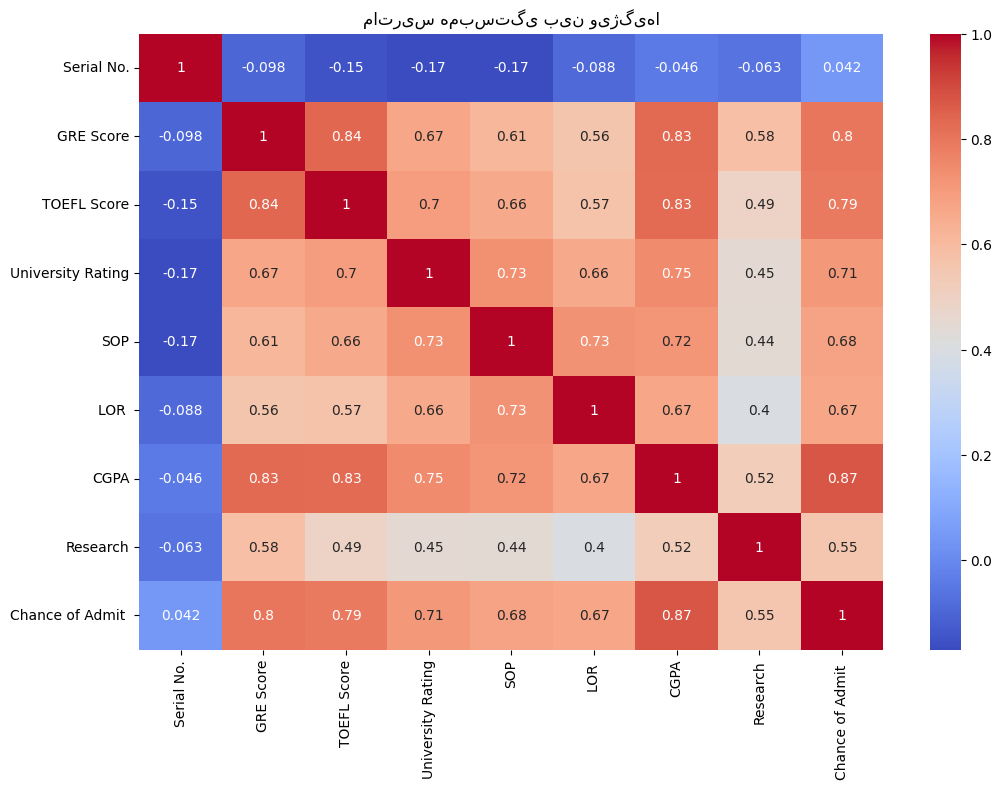

In [16]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('ماتریس همبستگی بین ویژگی‌ها')
plt.show()

Chance of Admit      1.000000
CGPA                 0.873289
GRE Score            0.802610
TOEFL Score          0.791594
University Rating    0.711250
SOP                  0.675732
LOR                  0.669889
Research             0.553202
Serial No.           0.042336
Name: Chance of Admit , dtype: float64


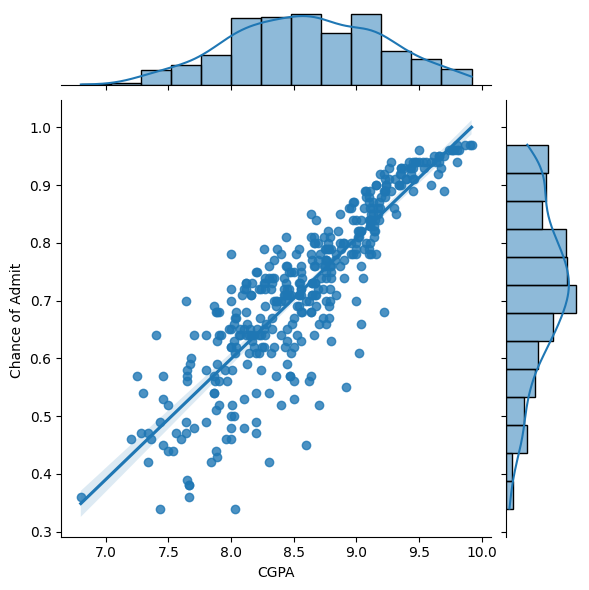

In [28]:
admission_corr = correlation_matrix['Chance of Admit '].sort_values(ascending=False)
print(admission_corr)

# انتخاب ویژگی با بیشترین همبستگی مثبت برای رسم نمودار توزیع
most_correlated_feature = admission_corr.index[1] # ایندکس 1 به این دلیل که اولین خود شانس پذیرش است
sns.jointplot(x=most_correlated_feature, y='Chance of Admit ', data=df, kind='reg')
plt.show()

In [32]:
# جدا کردن آخرین ستون و ذخیره‌سازی در یک متغیر جدید
last_column = df.iloc[:, -1]

# اگر می‌خواهید آخرین ستون را از df حذف کنید و آن را در یک DataFrame جدید ذخیره کنید
df_without_last_column = df.iloc[:, :-1]
y=last_column
X=df_without_last_column

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [34]:
from sklearn.model_selection import train_test_split

# فرض بر این است که X و y داده‌های ویژگی‌ها و برچسب‌ها هستند
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


R2 Score for the MLP with 1 hidden layer: -17.41990195414481
R2 Score for the MLP with multiple hidden layers: 0.4572146923316759
MSE for the MLP with 1 hidden layer: 0.28165878451751325
MSE for the MLP with multiple hidden layers: 0.008299732017706198
MLPRegressor(hidden_layer_sizes=(10, 5), random_state=42)


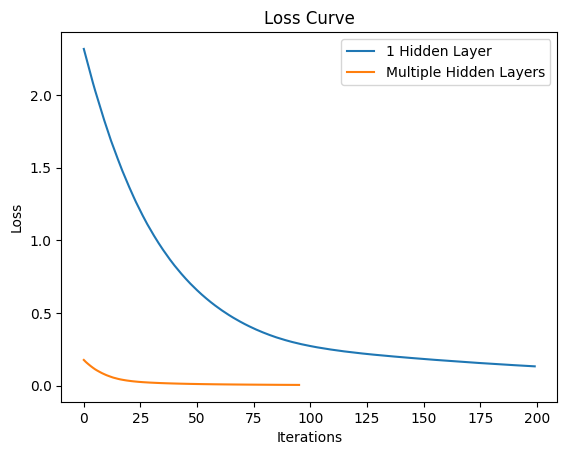

In [41]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# تقسیم داده‌ها به مجموعه آموزشی و تستی و سپس تقسیم مجموعه آموزشی به آموزش و اعتبارسنجی
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# پیش‌پردازش داده‌ها
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# ساختن دو مدل MLP: یکی با یک لایه پنهان و دیگری با دو لایه پنهان یا بیشتر
h=10
a1=10
a2=5
mlp_1_hidden_layer = MLPRegressor(hidden_layer_sizes=(h,), random_state=42)
mlp_multiple_hidden_layers = MLPRegressor(hidden_layer_sizes=(a1, a2), random_state=42)  # می‌توان h را با تعداد نورون‌های دلخواه تغییر داد

# آموزش مدل با یک لایه پنهان
mlp_1_hidden_layer.fit(X_train_scaled, y_train)

# آموزش مدل با چند لایه پنهان
mlp_multiple_hidden_layers.fit(X_train_scaled, y_train)

# ارزیابی مدل‌ها روی مجموعه اعتبارسنجی
y_val_pred_1_layer = mlp_1_hidden_layer.predict(X_val_scaled)
y_val_pred_multi_layer = mlp_multiple_hidden_layers.predict(X_val_scaled)

# محاسبه ضریب تعیین (R2) و اتلاف (MSE) برای هر مدل
r2_1_layer = r2_score(y_val, y_val_pred_1_layer)
r2_multi_layer = r2_score(y_val, y_val_pred_multi_layer)
mse_1_layer = mean_squared_error(y_val, y_val_pred_1_layer)
mse_multi_layer = mean_squared_error(y_val, y_val_pred_multi_layer)

# ذخیره بهترین مدل بر اساس ارزیابی انجام شده
best_model = mlp_1_hidden_layer if r2_1_layer > r2_multi_layer else mlp_multiple_hidden_layers

# نمایش نتایج
print(f"R2 Score for the MLP with 1 hidden layer: {r2_1_layer}")
print(f"R2 Score for the MLP with multiple hidden layers: {r2_multi_layer}")
print(f"MSE for the MLP with 1 hidden layer: {mse_1_layer}")
print(f"MSE for the MLP with multiple hidden layers: {mse_multi_layer}")
print(best_model)

# نمودار اتلاف برای هر مدل
import matplotlib.pyplot as plt

plt.plot(mlp_1_hidden_layer.loss_curve_, label='1 Hidden Layer')
plt.plot(mlp_multiple_hidden_layers.loss_curve_, label='Multiple Hidden Layers')
plt.title('Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

# برای نمودار R2 باید از تابع اختصاصی استفاده شود یا از داده‌های پیش‌بینی‌شده و واقعی، یک نمودار ساخت

In [43]:
import numpy as np

# انتخاب پنج نمونه تصادفی از داده‌های تست
np.random.seed(42)  # برای قابل تکرار بودن نتایج
random_indices = np.random.choice(X_test_scaled.shape[0], 5, replace=False)
selected_samples = X_test_scaled[random_indices]
# اصلاح شده: انتخاب مقادیر واقعی با استفاده از .iloc
true_values = y_test.iloc[random_indices].values


# پیش‌بینی شانس پذیرش با استفاده از بهترین مدلی که قبلاً آموزش داده‌ایم
predicted_values = best_model.predict(selected_samples)

# نمایش شانس پذیرش واقعی و پیش‌بینی‌شده
for i in range(5):
    print(f"Sample {i + 1}: True Admission Chance: {true_values[i]}, Predicted Admission Chance: {predicted_values[i]}")

# در اینجا یک معیار ساده به منظور ارزیابی دقت مدل می‌تواند مطرح شود
errors = true_values - predicted_values
accuracy = 1 - np.mean(np.abs(errors))
print(f"Estimated Accuracy: {accuracy:.2f}")

# به منظور بررسی دقیق‌تر، می‌توان از معیارهای دیگر مانند MSE یا MAE نیز استفاده کرد
mse = mean_squared_error(true_values, predicted_values)
mae = np.mean(np.abs(errors))
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")

Sample 1: True Admission Chance: 0.68, Predicted Admission Chance: 0.8094508655871622
Sample 2: True Admission Chance: 0.94, Predicted Admission Chance: 0.9204841831101412
Sample 3: True Admission Chance: 0.72, Predicted Admission Chance: 0.8825907964192059
Sample 4: True Admission Chance: 0.82, Predicted Admission Chance: 0.8717392600262986
Sample 5: True Admission Chance: 0.93, Predicted Admission Chance: 0.9676919526930305
Estimated Accuracy: 0.92
MSE: 0.0095
MAE: 0.0802


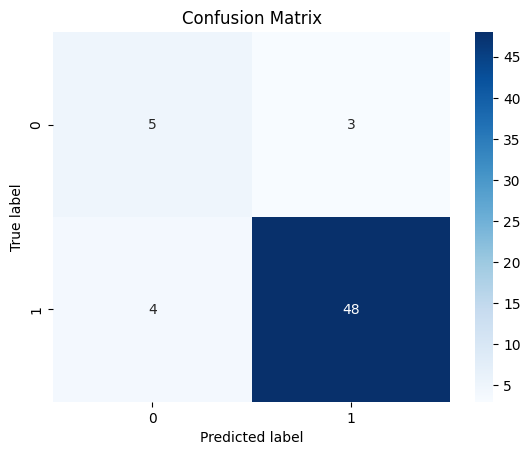

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# تعیین حدود برای تبدیل مقادیر پیوسته به دسته‌های گسسته
threshold = 0.5  # مثلا مقدار نصف که باید بر اساس مسئله تنظیم شود

# پیش‌بینی شانس‌های پذیرش از مدل
y_pred_continuous = best_model.predict(X_test_scaled)

# تبدیل پیش‌بینی‌ها به دسته‌های گسسته بر اساس حدود تعیین شده
y_pred_discrete = (y_pred_continuous > threshold).astype(int)

# حالت ایده‌آل: تبدیل مقادیر واقعی y_test به دسته‌های گسسته، اگر این امکان‌پذیر نیست و برای انجام این کار نیاز به شناخت بیشتر از داده‌ها دارید
y_test_discrete = (y_test > threshold).astype(int)

# محاسبه ماتریس کانفیوژن
conf_matrix = confusion_matrix(y_test_discrete, y_pred_discrete)

# رسم ماتریس کانفیوژن
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [55]:
# این تابع یک ورودی از کاربر گرفته، آن را به عدد تبدیل کرده و مطمئن شوید که عدد است
def get_user_input(feature_name, min_value, max_value):
    # چرخه فراخوانی تا مقداری که عدد است و در بازه مورد نظر قرار دارد
    while True:
        try:
            value = float(input(f"لطفا مقدار {feature_name} را وارد کنید ({min_value} تا {max_value}): "))
            if min_value <= value <= max_value:
                return value
            else:
                print(f"خطا: مقدار باید بین {min_value} و {max_value} باشد.")
        except ValueError:
            print("خطا: لطفا یک عدد وارد کنید.")

# فرض کنید feature_names حاوی نام ویژگی‌ها و min_max_values حاوی حداقل و حداکثر مقادیر هر ویژگی است
min_1, max_1 = 0, 10
min_2, max_2 = -5, 5
# مقادیر بقیه ویژگی‌ها باید مقداردهی شوند
min_3, max_3 = 1, 100  # مثال: برای ویژگی 3
min_4, max_4 = 10, 200  # مثال: برای ویژگی 4
min_5, max_5 = 0, 50    # مثال: برای ویژگی 5
min_6, max_6 = 5, 20    # مثال: برای ویژگی 6
min_7, max_7 = -10, 10  # مثال: برای ویژگی 7
min_8, max_8 = 2, 8     # مثال: برای ویژگی 8

feature_names = ['ویژگی 1', 'ویژگی 2', 'ویژگی 3', 'ویژگی 4', 'ویژگی 5', 'ویژگی 6', 'ویژگی 7', 'ویژگی 8']
min_max_values = [(min_1, max_1), (min_2, max_2), (min_3, max_3), (min_4, max_4), (min_5, max_5), (min_6, max_6), (min_7, max_7), (min_8, max_8)]

# باقی کد بدون تغییر خواهد ماند و باید تکمیل شود.1

feature_names = ['ویژگی 1', 'ویژگی 2', 'ویژگی 3', 'ویژگی 4', 'ویژگی 5', 'ویژگی 6', 'ویژگی 7', 'ویژگی 8']
min_max_values = [(min_1, max_1), (min_2, max_2), (min_3, max_3), (min_4, max_4), (min_5, max_5), (min_6, max_6), (min_7, max_7), (min_8, max_8)]

# جمع‌آوری ورودی‌ها از کاربر و مقیاس بندی آن‌ها
user_input_scaled = []

for feature_name, (min_value, max_value) in zip(feature_names, min_max_values):
    user_input = get_user_input(feature_name, min_value, max_value)
    # مقیاس بندی مقدار ورودی بر اساس حداقل و حداکثر
    scaled_input = (user_input - min_value) / (max_value - min_value)
    user_input_scaled.append(scaled_input)

# تبدیل ورودی کاربر برای استفاده در مدل
user_input_scaled = np.array([user_input_scaled])

# پیش‌بینی با استفاده از مدل
# فرض کنید که 'best_model' مدل ذخیره شده شما است که قبلاً آموزش دیده است
predicted_chance = best_model.predict(user_input_scaled)[0]

# تبدیل پیش‌بینی به درصد
predicted_chance_percentage = predicted_chance * 100

# نمایش نتیجه
print(f"شانس پذیرش پیش بینی شده: {predicted_chance_percentage:.2f}%")

لطفا مقدار ویژگی 1 را وارد کنید (0 تا 10): 4
لطفا مقدار ویژگی 2 را وارد کنید (-5 تا 5): 2
لطفا مقدار ویژگی 3 را وارد کنید (1 تا 100): 3
لطفا مقدار ویژگی 4 را وارد کنید (10 تا 200): 5
خطا: مقدار باید بین 10 و 200 باشد.
لطفا مقدار ویژگی 4 را وارد کنید (10 تا 200): 11
لطفا مقدار ویژگی 5 را وارد کنید (0 تا 50): 5
لطفا مقدار ویژگی 6 را وارد کنید (5 تا 20): 2
خطا: مقدار باید بین 5 و 20 باشد.
لطفا مقدار ویژگی 6 را وارد کنید (5 تا 20): 6
لطفا مقدار ویژگی 7 را وارد کنید (-10 تا 10): 7
لطفا مقدار ویژگی 8 را وارد کنید (2 تا 8): 4
شانس پذیرش پیش بینی شده: 90.48%
